In [1]:
# Import Dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import requests as requests
import time
from scipy import stats 
#import linregress
import json

from scipy.stats import linregress

from sklearn import datasets

In [2]:
#CDC COVID-19 vaccination in the US url
vax_url = "https://data.cdc.gov/resource/8xkx-amqh"

In [3]:
# vax_url = "https://data.cdc.gov/resource/8xkx-amqh"
# #request API and get json objects

# # vax_response = requests.get(vax_url).json()
# # vax_response

# df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$limit=25000")
# ##df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where=date_extract_y(date)<2021&$limit=25000")


In [4]:
# vax_response = requests.get("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                   "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)")
# vax_response_json=vax_response.json()

In [5]:
# # increasing the data rows to be pulled to a count
# df = pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                  "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)&$limit=25000")

In [6]:
#df.info()

In [7]:
#CDC COVID-19 mortality rate in the US by age and sex url
mort_url = "https://data.cdc.gov/resource/9bhg-hcku"

In [8]:
#Data frame of the CDC COVID-19 mortality rate in the US by age and sex as of 09/30/2021
#df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$where="
#                  "(date_extract_y(end_date)%20%3C=%202021%20AND%20date_extract_m(end_date)%20%3C=9)&$limit=500000")

In [9]:
df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$limit=1000000")
                

In [10]:
len(df_mort)

68850

In [11]:
# Displaying one record 
df_mort.iloc[500]

data_as_of                                                 2021-10-20T00:00:00.000
start_date                                                 2020-01-01T00:00:00.000
end_date                                                   2021-10-16T00:00:00.000
group                                                                     By Total
state                                                         District of Columbia
sex                                                                         Female
age_group                                                              25-34 years
covid_19_deaths                                                                NaN
total_deaths                                                                 116.0
pneumonia_deaths                                                              10.0
pneumonia_and_covid_19_deaths                                                  NaN
influenza_deaths                                                               0.0
pneu

In [12]:
#data frame with required fields
new_df=df_mort[["group","year","month","state","sex","age_group","covid_19_deaths",
                "total_deaths"]]
pd.options.display.float_format = "{:.0f}".format

In [13]:
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,723880,5928410
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,132,33432
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,542,59268
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,63,6236
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,172,9911
...,...,...,...,...,...,...,...,...
68845,By Month,2021,10,Puerto Rico,Female,50-64 years,NaN,21
68846,By Month,2021,10,Puerto Rico,Female,55-64 years,NaN,17
68847,By Month,2021,10,Puerto Rico,Female,65-74 years,NaN,19
68848,By Month,2021,10,Puerto Rico,Female,75-84 years,NaN,29


In [14]:
new_df.drop(new_df.loc[(new_df["month"] == 10)&(new_df["year"] == 2021)].index, inplace=True)

In [15]:
#Dropping data for age_groups -"Under 1 year", "1-4 years", "All Ages","5-14 years","15-24 years"
# and "25-34 years" , "35-44 years",  "45-54 years",  "55-64 years"

new_df.drop(new_df.loc[new_df["age_group"]=="Under 1 year"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="1-4 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="All Ages"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="5-14 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="15-24 years"].index, inplace=True)


new_df.drop(new_df.loc[new_df["age_group"]=="25-34 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="35-44 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="45-54 years"].index, inplace=True) 
new_df.drop(new_df.loc[new_df["age_group"]=="55-64 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["state"]=="United States"].index, inplace=True)
new_df.drop(new_df.loc[new_df["sex"]=="All Sexes"].index, inplace=True)



In [16]:
new_df["age_group"].unique()

array(['0-17 years', '18-29 years', '30-39 years', '40-49 years',
       '50-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [17]:
new_df.reset_index()

,index,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,70,By Total,NaN,NaN,Alabama,Male,0-17 years,NaN,786
1,74,By Total,NaN,NaN,Alabama,Male,18-29 years,57,1593
2,76,By Total,NaN,NaN,Alabama,Male,30-39 years,171,2081
3,78,By Total,NaN,NaN,Alabama,Male,40-49 years,418,3363
4,80,By Total,NaN,NaN,Alabama,Male,50-64 years,1800,13151
...,...,...,...,...,...,...,...,...,...
20347,68792,By Month,2021,9,Puerto Rico,Female,40-49 years,NaN,27
20348,68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
20349,68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
20350,68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [18]:
# Mortality rate Vs Gender  - Data for Pie Chart
gender_df=new_df.groupby(by=["sex"]).sum()
gender_df = gender_df.drop("year",1)
gender_df = gender_df.drop("month",1)
#update_df = gender_df.drop('All Sexes')
gender_df



,covid_19_deaths,total_deaths
sex,,
Female,965456,8470478
Male,1187454,9426288


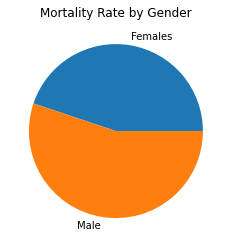

<Figure size 432x288 with 0 Axes>

In [19]:
labels = "Females", "Male"
sizes=gender_df["covid_19_deaths"]
plt.pie(sizes,labels=labels);
plt.title("Mortality Rate by Gender");
plt.show()
#plot = gender_df.plot.pie(y='covid_19_deaths', figsize=(7, 7), title="Mortality Rate by Gender")
plt.savefig("./mkfg_figures/Mortalityratebygender.png")
        

In [20]:
#Mortality rate by age group - Data for scatter plot

age_group_df=new_df.groupby(by=["age_group"]).sum()

age_group_df = age_group_df.drop("year",1)
age_group_df = age_group_df.drop("month",1)

covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()
total_deaths_sum = age_group_df["total_deaths"]



age_group_df

,covid_19_deaths,total_deaths
age_group,,
0-17 years,433,175453
18-29 years,9258,338779
30-39 years,31247,492755
40-49 years,83045,738710
50-64 years,384367,3015471
65-74 years,488149,3638856
75-84 years,568098,4330232
85 years and over,588313,5166510


In [38]:
#new_df2 = age_group_df[["age_group","covid_19_deaths"]]

#age_group_df.index
#age_group_df.index.to_list()

df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()
pd.options.display.float_format = "{:.0f}".format
df2



,age_group,sum
0,0-17 years,433
1,18-29 years,9258
2,30-39 years,31247
3,40-49 years,83045
4,50-64 years,384367
5,65-74 years,488149
6,75-84 years,568098
7,85 years and over,588313


0           0-17 years
1          18-29 years
2          30-39 years
3          40-49 years
4          50-64 years
5          65-74 years
6          75-84 years
7    85 years and over
Name: age_group, dtype: object
The r squared value : 0.9521917419599941
y= 102159.38x + -88444.08


<ipython-input-76-551383d257b8>:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y=np.array(df2.iloc[:,1].astype(np.float).to_list())


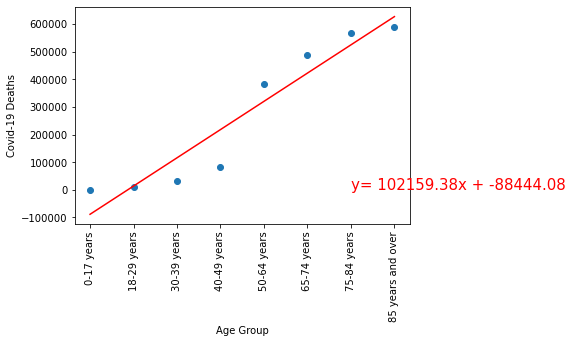

In [76]:
df2 = age_group_df['covid_19_deaths'].to_frame(name = 'sum').reset_index()


#x = np.array(df2.index.tolist())
x = np.array(df2.iloc[:,0].index.tolist())

y=np.array(df2.iloc[:,1].astype(np.float).to_list())

#x = np.array([1, 2, 3, 4])
#y = np.array([ 6, 3, 9, 5 ])
# plt.plot(x, y, 'o')
# m, b = np.polyfit(x, y, 1)
# plt.plot(x, m*x + b)

xticks_name=df2.iloc[:,0]

#bars=df2.index.tolist()[0:1]
print(xticks_name)
x_pos = np.arange(len(xticks_name))

 
# Create names on the x-axis
plt.xticks(x_pos, xticks_name,rotation=90)

vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x,y)


vc_fit = vc_slope * x + vc_int
print(f"The r squared value : {vc_r}")
line_eq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
print(lineeq)
plt.scatter(x,y)

plt.plot(x,vc_fit,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Age Group')
plt.ylabel('Covid-19 Deaths')

plt.show()

In [77]:
#Mortality rate by age group - Data for scatter plot

# x =age_group_df.index.tolist()
# y =age_group_df["covid_19_deaths"].astype(np.float).to_list()

# plt.plot(x, y, 'o', color='blue');

# plt.xticks(rotation = 45) 
# plt.ylabel("Number of Deaths")
# plt.xlabel("Age Group")
# plt.title("Number of Deaths by age group")
# # Show graphic
# plt.show()
# plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/Numberofdeathsbyagegroupscatter.png")




# # Add the linear regression equation and line to plot
# x_values = df2['age_group']
# # x_values =age_group_df.index.tolist()
# y_values = df2['sum']
# # x_values =age_group_df.index.to_list()
# # y_values =age_group_df["covid_19_deaths"].astype(np.float).to_list()
# #y_values =age_group_df["covid_19_deaths"]
# #(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# # regress_values = x_values * slope + intercept
# # line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# # plt.plot(x_values,regress_values,"r-")
# # plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Age Group')
# plt.ylabel('Covid-19 Deaths')
# plt.show()

# #x_values = df2.iloc[:,0].to_list()
# x_values =df2.index.tolist()
# print(x_values)
# #y_values = df2.iloc[:,1]
# y_values = df2.iloc[:,1].astype(np.float).to_list()

# print(y_values)

# plt.scatter(x_values,y_values)


# #vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_values,y_values)


# # vc_fit = vc_slope * x_values + vc_int
# # print(f"The r squared value : {vc_r}")
# # lineeq="y= "+ str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
# #print(lineeq)
# plt.scatter(x_values,y_values)


# #plt.plot(x_values,vc_fit,"--")
# plt.show()






In [26]:
#Mortality By state - Data horizontal bar graph
state_df=new_df.groupby(by=["state"]).sum()
state_df.loc['New York'] += state_df.loc['New York City']
state_df.drop(['New York City'], inplace=True)
state_df = state_df.drop("year",1)
state_df = state_df.drop("month",1)


In [27]:
state_df

,covid_19_deaths,total_deaths
state,,
Alabama,44132,342118
Alaska,1444,25581
Arizona,55022,412193
Arkansas,24522,203754
California,221109,1716682
Colorado,24210,247195
Connecticut,25535,185223
Delaware,5381,57082
District of Columbia,4222,37707


In [28]:
sorted_state_df= state_df.sort_values("covid_19_deaths",ascending=False)

In [29]:
# Mortlaity by State counts sorted in descending order
sorted_state_df["covid_19_deaths"]

state
California             221109
Texas                  217264
New York               171381
Florida                168392
Pennsylvania            92479
Ohio                    79102
New Jersey              77298
Illinois                73850
Georgia                 72411
Michigan                59785
North Carolina          57396
Arizona                 55022
Tennessee               54319
Indiana                 47204
Alabama                 44132
Missouri                43453
Massachusetts           42415
Virginia                39062
South Carolina          38227
Louisiana               37839
Maryland                33497
Oklahoma                32558
Kentucky                30469
Mississippi             30056
Wisconsin               27912
Connecticut             25535
Minnesota               25013
Arkansas                24522
Colorado                24210
Washington              22943
Nevada                  22670
Iowa                    20212
Kansas                  17770
New 

In [30]:
sorted_state_df.iloc[0:5]
top5states_df=sorted_state_df.head()


<ipython-input-78-9464c9d38ab5>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


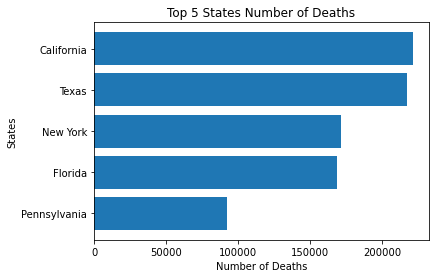

<Figure size 432x288 with 0 Axes>

In [78]:
#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=sorted_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("Top 5 States Number of Deaths")
plt.show()

#plot = update_df.plt.barh(y='covid_19_deaths', figsize=(7, 7), title="Mortlaity by State counts sorted in descending order")
plt.savefig("./mkfg_figures/Mortalityratebystate.png")
        

In [32]:
#Mortality rate for Gender types for different age groups - Stacked bar graph

gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
gender_agegroup_df = gender_agegroup_df.drop("year",1)
gender_agegroup_df = gender_agegroup_df.drop("month",1)

In [33]:
gender_agegroup_df

covid_19_deaths  total_deaths
sex    age_group                                       
Female 0-17 years                     156         72457
       18-29 years                   3446         89825
       30-39 years                  11248        157522
       40-49 years                  29268        267318
       50-64 years                 142012       1152828
       65-74 years                 194549       1525645
       75-84 years                 249029       2069538
       85 years and over           335748       3135345
Male   0-17 years                     277        102996
       18-29 years                   5812        248954
       30-39 years                  19999        335233
       40-49 years                  53777        471392
       50-64 years                 242355       1862643
       65-74 years                 293600       2113211
       75-84 years                 319069       2260694
       85 years and over           252565       2031165

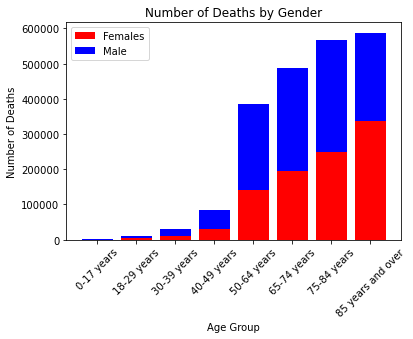

<Figure size 432x288 with 0 Axes>

In [79]:
#Mortality rate by age group - Data for stack bars

x=gender_agegroup_df.xs('Female',level='sex').index.to_list()
y1=gender_agegroup_df.xs('Female',level='sex')["covid_19_deaths"].astype(int).to_list()
y2=gender_agegroup_df.xs('Male',level='sex')["covid_19_deaths"].astype(int).to_list()

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation = 45)

plt.ylabel("Number of Deaths")
plt.xlabel("Age Group")
plt.title("Number of Deaths by Gender")
# Show graphic
#plt.legend([])
plt.legend(labels,loc='upper left')
plt.show()
plt.savefig("./mkfg_figures/NumberofdeathsStackBar.png")



In [35]:
#Mortality total count per year 

Year_group_df=new_df.groupby(by=["year"]).sum()

Year_group_df

,month,covid_19_deaths,total_deaths
year,,,
2020,66144,764181,6836306
2021,38160,662255,5075152


In [36]:
#Mortality rate for Year for different age groups 

Year_Month_df=new_df.groupby(by=["year","month"]).sum()
#gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
Year_Month_df


covid_19_deaths  total_deaths
year month                               
2020 1                    0        266880
     2                    0        246910
     3                 6247        272067
     4                64670        324318
     5                37401        282522
     6                17095        252380
     7                30223        281203
     8                29194        279713
     9                18427        259361
     10               24203        276106
     11               52640        304818
     12               97762        369591
2021 1               104699        375682
     2                47599        284217
     3                22163        272797
     4                17608        258615
     5                13767        258870
     6                 6679        243031
     7                 9783        252433
     8                46109        291994
     9                54334        272669

In [ ]:
Year_Month_df["covid_19_deaths"]